In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df=pd.read_csv("C:/Users/anjal/Downloads/Customer Churn.csv")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [4]:
#rename columns
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "total_sec_calls", "Frequency of use": "total_num_calls", "Frequency of SMS": "total_num_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [5]:
df

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,age_group,tariff_plan,status,age,customer_value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [6]:
#see how many unique values for each col
df.nunique()

call_failure            37
complains                2
subs_len                45
charge_amount           11
total_sec_calls       1756
total_num_calls        242
total_num_sms          405
distinct_call_nums      92
age_group                5
tariff_plan              2
status                   2
age                      5
customer_value        2654
FN                    2654
FP                    2195
Churn                    2
dtype: int64

In [7]:
#there is no Nan values
df.isnull().sum()

call_failure          0
complains             0
subs_len              0
charge_amount         0
total_sec_calls       0
total_num_calls       0
total_num_sms         0
distinct_call_nums    0
age_group             0
tariff_plan           0
status                0
age                   0
customer_value        0
FN                    0
FP                    0
Churn                 0
dtype: int64

# EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

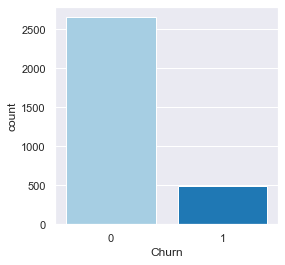

In [8]:
#see target class is imbalanced

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10)

<AxesSubplot:xlabel='age_group', ylabel='count'>

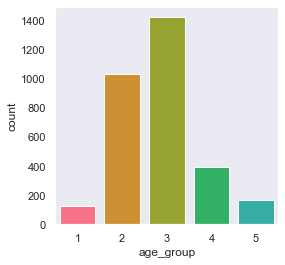

In [9]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10)

<AxesSubplot:xlabel='charge_amount', ylabel='count'>

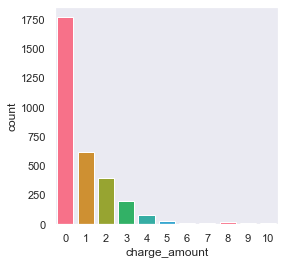

In [10]:
sns.set_style("dark")
sns.countplot(x="charge_amount", data=df, palette=sns.color_palette("husl", 8), saturation=10)

<AxesSubplot:xlabel='age_group', ylabel='count'>

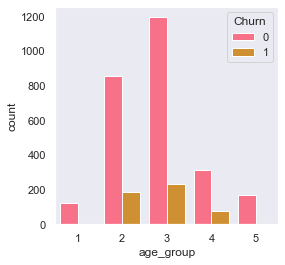

In [11]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10, hue="Churn")

<AxesSubplot:xlabel='charge_amount', ylabel='count'>

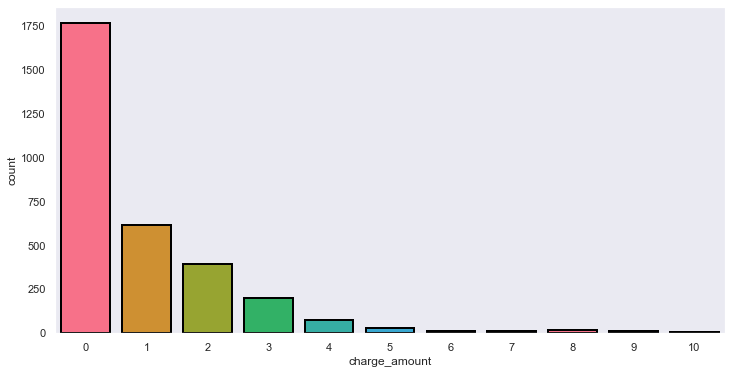

In [12]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12.0, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

sns.set(style="white",font_scale=1)


sns.set_style("dark")
sns.countplot(x="charge_amount", data=df, palette=sns.color_palette("husl", 8), 
              saturation=10, edgecolor=(0,0,0), linewidth=2)

In [13]:
pip install palettable


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


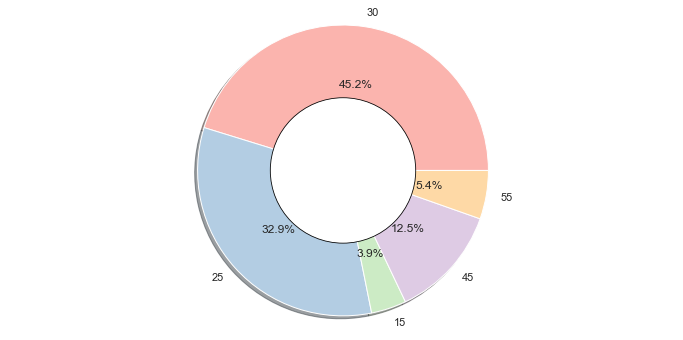

In [14]:
# library
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# create data
names=list(df["age"].unique())
sizes=[df["age"].value_counts()[unique_class]*100/len(df["age"]) for unique_class in names]
colors = Pastel1_7.hex_colors
explode = (0, 0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=names, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.50, color='black', fc='white',linewidth=0.80)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [15]:
cat_feature_col=["complains", "charge_amount", "tariff_plan", "status", "age","Churn"]
for i in cat_feature_col:
    print(f"{i} : {df[i].unique()}")
    print(df[i].value_counts())
    print("-------------------------------------------")

complains : [0 1]
0    2909
1     241
Name: complains, dtype: int64
-------------------------------------------
charge_amount : [ 0  1  2  3  8  4  9  7  5 10  6]
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: charge_amount, dtype: int64
-------------------------------------------
tariff_plan : [1 2]
1    2905
2     245
Name: tariff_plan, dtype: int64
-------------------------------------------
status : [1 2]
1    2368
2     782
Name: status, dtype: int64
-------------------------------------------
age : [30 25 15 45 55]
30    1425
25    1037
45     395
55     170
15     123
Name: age, dtype: int64
-------------------------------------------
Churn : [0 1]
0    2655
1     495
Name: Churn, dtype: int64
-------------------------------------------


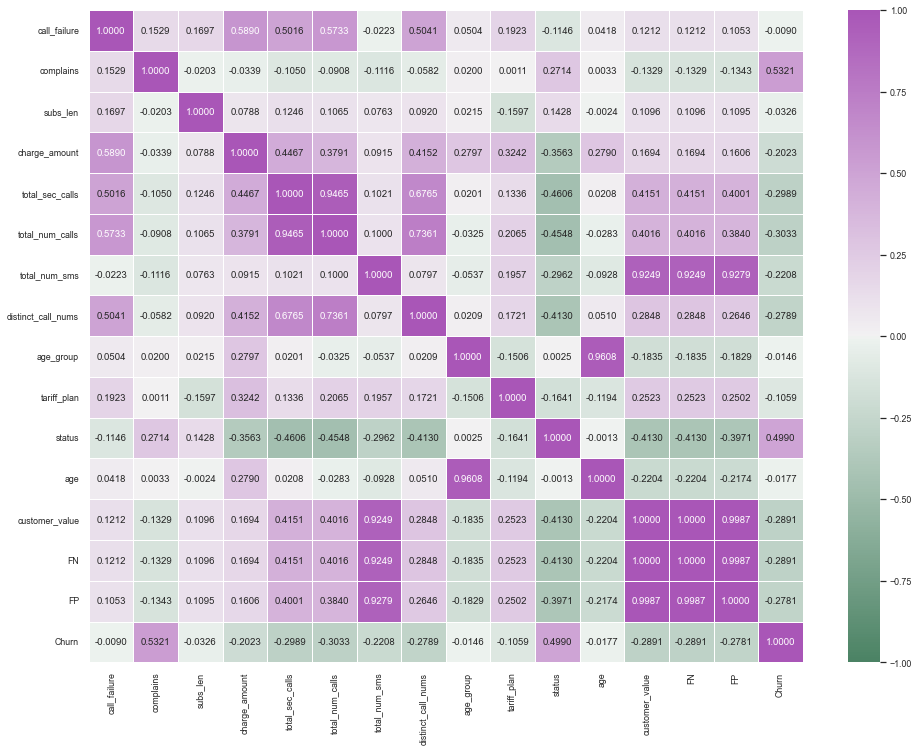

In [16]:
#heatmap for correlation coefficient

# calculate correlation
df_corr = df.corr()

# correlation matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True))

#plt.yticks(rotation=0)
plt.show()

<AxesSubplot:title={'center':'Churn vs all features'}>

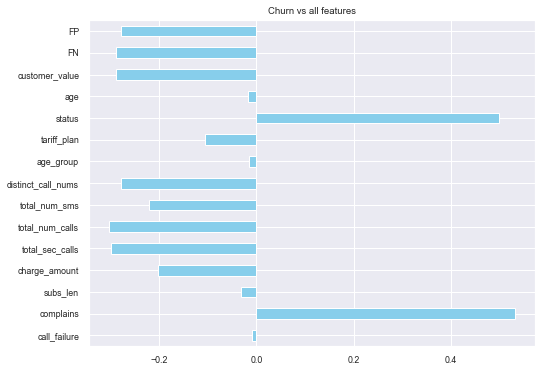

In [17]:
#feature importance using corr
df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='barh', figsize=(8, 6), color='skyblue', title="Churn vs all features")

In [18]:
!pip install ppscore

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:xlabel='x', ylabel='y'>

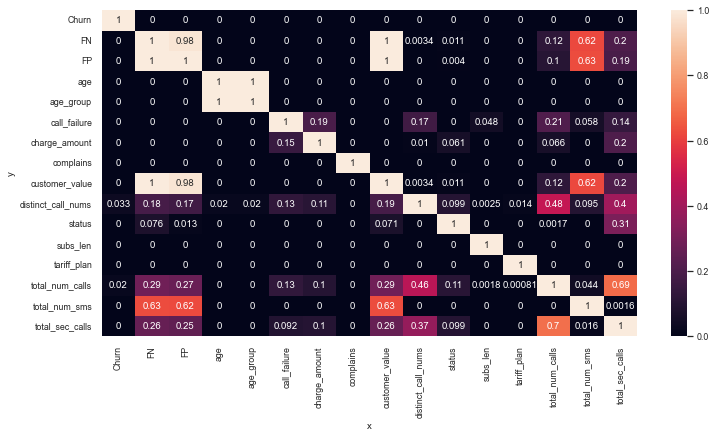

In [19]:
import seaborn as sns
import ppscore as pps

matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

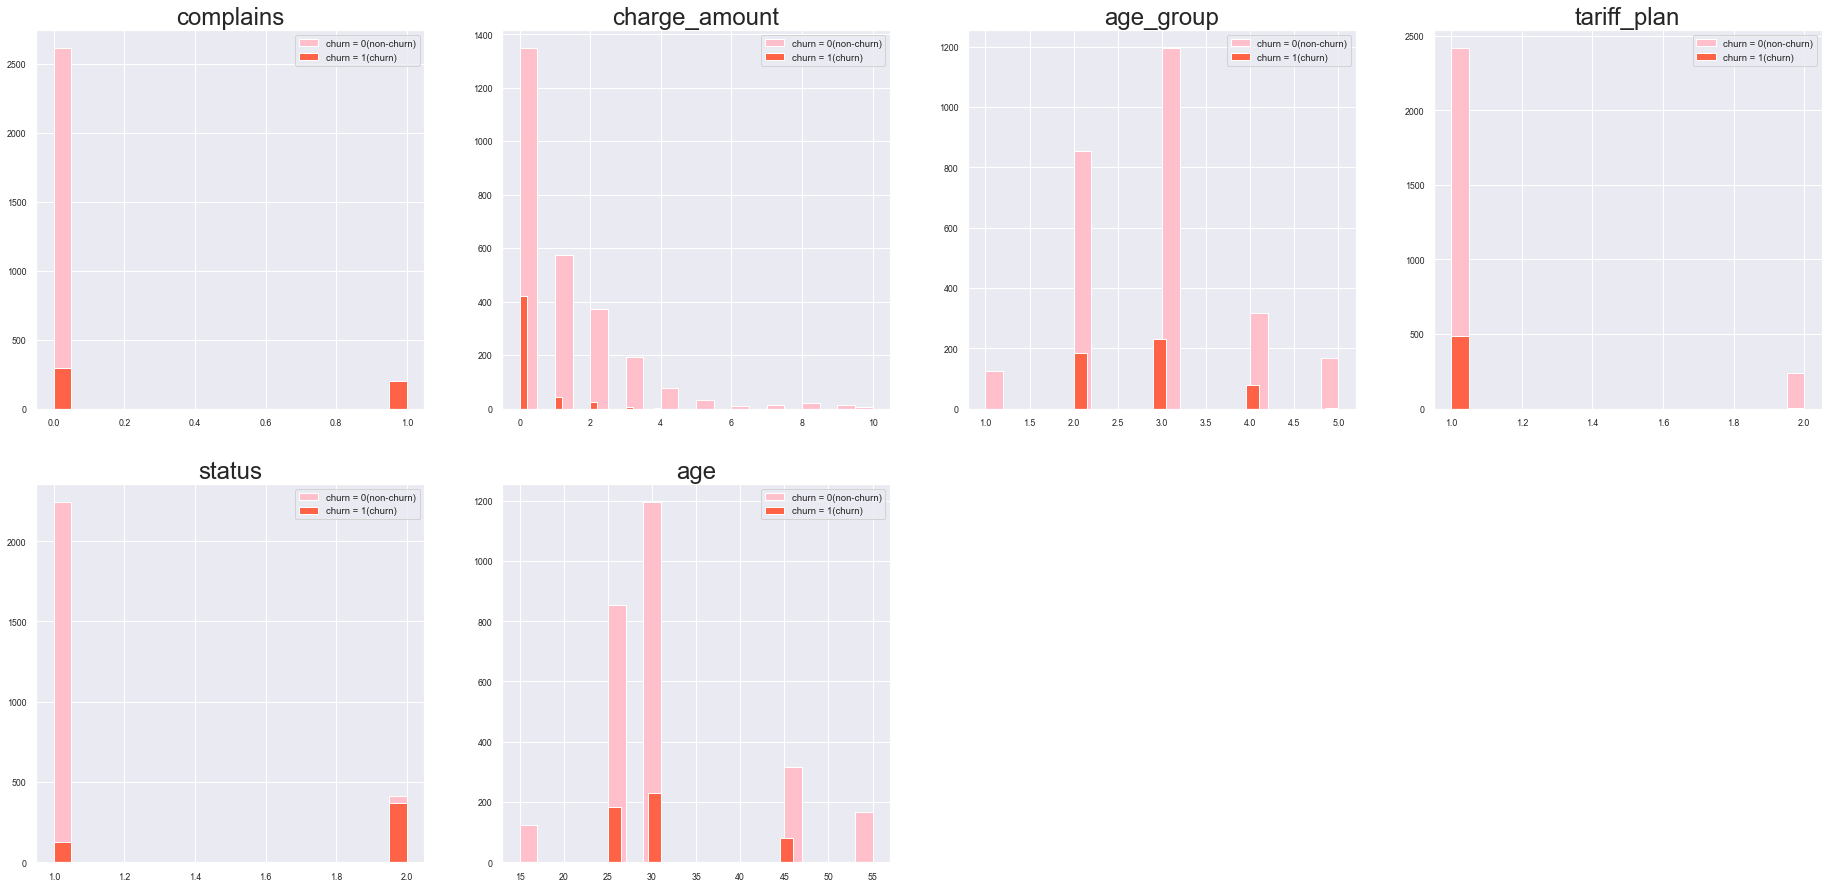

In [20]:
#for cat data distribution
import matplotlib

plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size

cat_feature_col=["complains", "charge_amount", "age_group", "tariff_plan", "status", "age"]
for i, column in enumerate(cat_feature_col, 1):
    plt.subplot(4, 4, i)
    df[df["Churn"] == 0][column].hist(bins=20, color='pink', label='churn = 0(non-churn)', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=20, color='tomato', label='churn = 1(churn)', alpha=1)
    plt.legend(fontsize='medium')
    plt.title(column)

In [21]:
#since age_group and age is highly correlated, we decide to del age_group
df1=df.drop(columns=["age_group", "FN", "FP"])
df1

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn
0,8,0,38,0,4370,71,5,17,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,1,1,30,1077.640,0


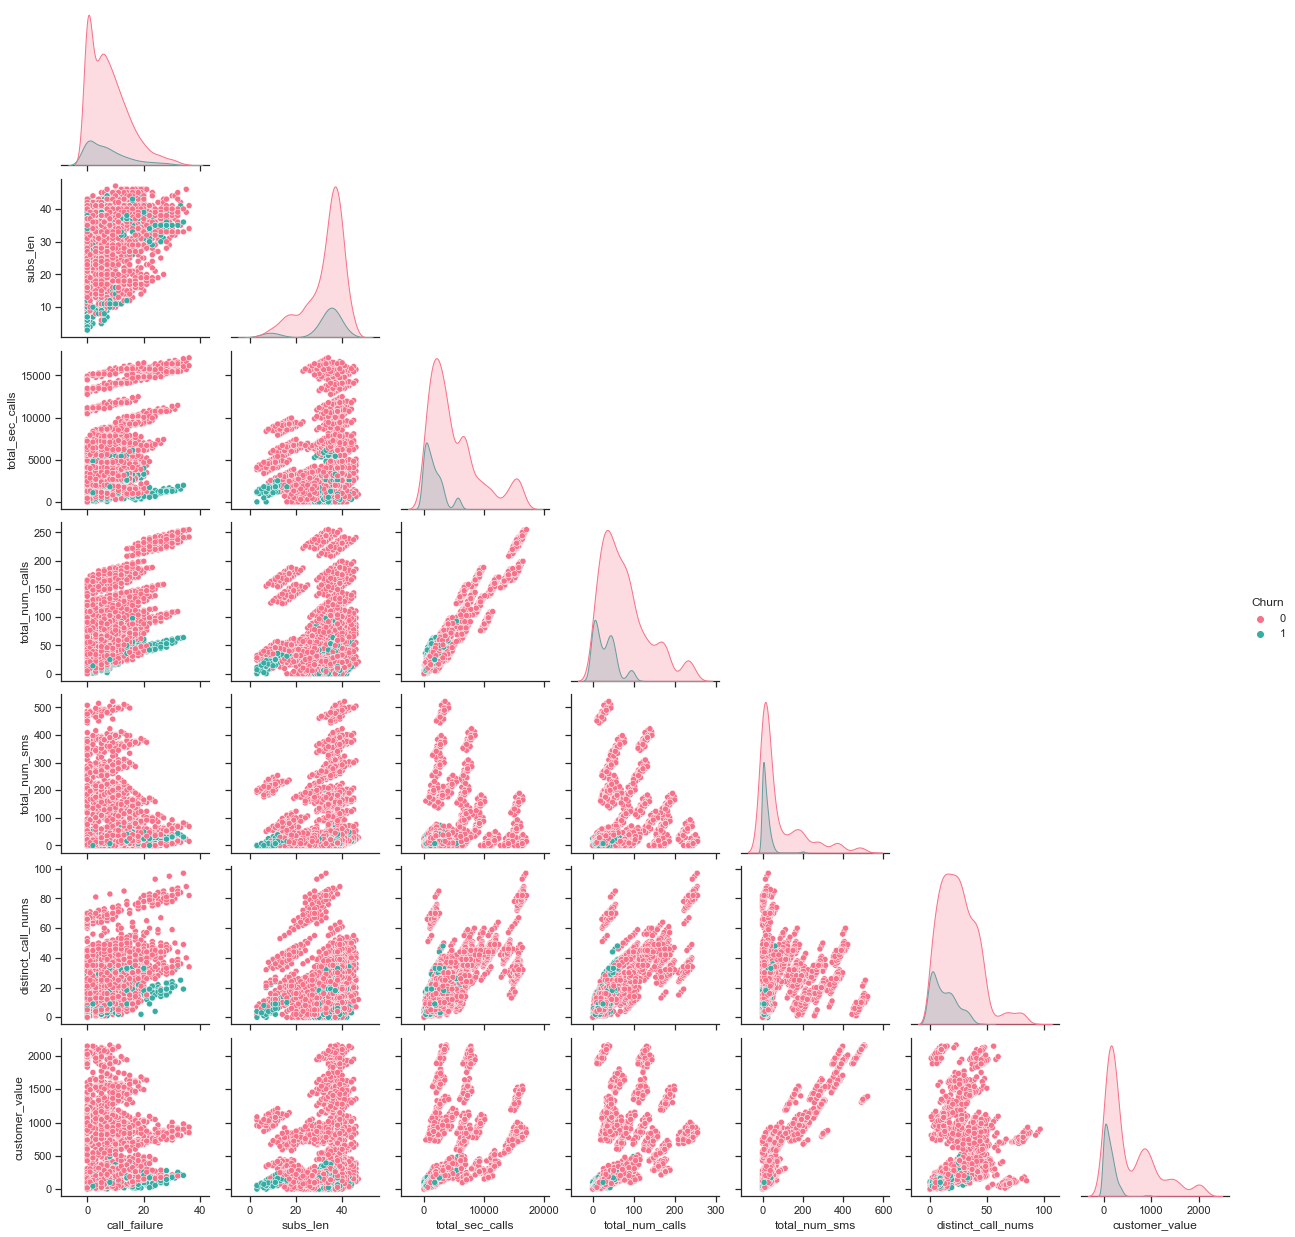

In [22]:
#for cont data scatterplot matrix
cont_feature_col=["call_failure", "subs_len", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums","customer_value"]

sns.set(style="ticks")

sns.pairplot(df[cont_feature_col + ['Churn']], hue='Churn', palette="husl", corner=True)

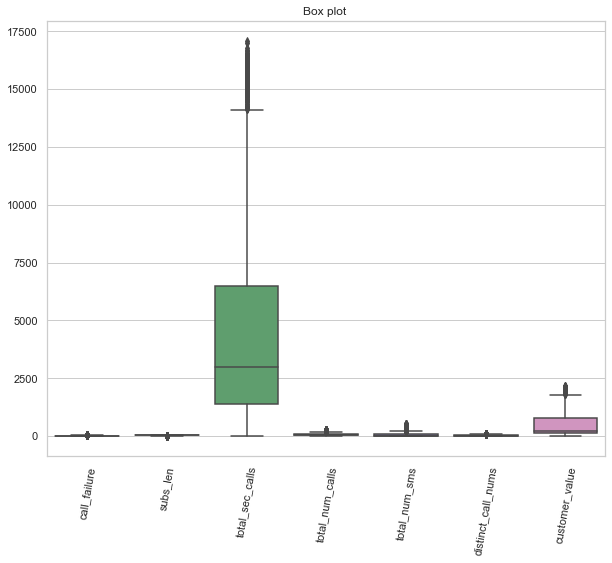

In [23]:
#outlier analysis using box-plot(continuos data can have outliers)

sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=df[cont_feature_col])
plt.xticks(rotation=80)
plt.title("Box plot ")
plt.show()

In [24]:
df.describe()

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,age_group,tariff_plan,status,age,customer_value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [25]:
# find the IQR
q1 = df[cont_feature_col].quantile(.25)
q3 = df[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_df = np.logical_or((df[cont_feature_col] < (q1 - 1.5 * IQR)), (df[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

,total,outlier(%)
name of the column,,
call_failure,47,1.492063
subs_len,282,8.952381
total_sec_calls,200,6.349206
total_num_calls,129,4.095238
total_num_sms,368,11.682540
distinct_call_nums,77,2.444444
customer_value,116,3.682540


In [26]:
outliers_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3145,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False
3147,False,False,False,False,False,False,False
3148,False,True,False,False,True,False,False


In [27]:
df_cont=df[cont_feature_col]
out_nan_df=df_cont[~outliers_df]
out_nan_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.0,4370.0,71.0,5.0,17.0,197.640
1,0.0,39.0,318.0,5.0,7.0,4.0,46.035
2,10.0,37.0,2453.0,60.0,NaN,24.0,1536.520
3,10.0,38.0,4198.0,66.0,1.0,35.0,240.020
4,3.0,38.0,2393.0,58.0,2.0,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.0,6697.0,147.0,92.0,44.0,721.980
3146,17.0,NaN,9237.0,177.0,80.0,42.0,261.210
3147,13.0,18.0,3157.0,51.0,38.0,21.0,280.320
3148,7.0,NaN,4695.0,46.0,NaN,12.0,1077.640


In [28]:
for col in cont_feature_col:
  #qq=out_nan_df.dropna()
  col_mean=df[col].mean() #calculate mean for each col
  out_nan_df[col]=out_nan_df[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
  #df[cont_feature_col]=df_cont

In [29]:
out_nan_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640


In [30]:
deneme=df.drop(columns=["call_failure", "subs_len", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums", "customer_value"])

In [31]:
#concat cat_df and clear out of outliers cont_df

df=pd.concat([out_nan_df, deneme], axis=1)
df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,charge_amount,age_group,tariff_plan,status,age,FN,FP,Churn
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640,0,0,3,1,1,30,177.8760,69.7640,0
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035,0,0,2,1,2,25,41.4315,60.0000,0
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520,0,0,3,1,1,30,1382.8680,203.6520,0
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020,0,0,1,1,1,15,216.0180,74.0020,0
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805,0,0,1,1,1,15,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980,0,2,2,2,1,25,649.7820,122.1980,0
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210,0,1,5,1,1,55,235.0890,76.1210,0
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320,0,4,3,1,1,30,252.2880,78.0320,0
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640,0,2,3,1,1,30,969.8760,157.7640,0


# Multi-Layer Artificial Neural Networks (MLP)

In [32]:
search_mode = False
# search_mode = True

In [33]:
if search_mode:
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50), (100,100)],
        'activation': ['logistic', 'tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate_init': [0.001, 0.01, 0.1],
    }

    # Create an MLP classifier object
    mlp = MLPClassifier(max_iter=1000)

    # Create RandomizedSearchCV instance
    random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding score
    print("Best parameters:", random_search.best_params_)
    print("Best score:", random_search.best_score_)

    learning_rate_init = random_search.best_params_.get('learning_rate_init')
    hidden_layer_sizes = random_search.best_params_.get('hidden_layer_sizes')
    alpha = random_search.best_params_.get('alpha')
    activation = random_search.best_params_.get('activation')

    mlp = random_search.best_estimator_

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rate_init = 0.001
hidden_layer_sizes = (100, 50)
alpha = 0.01
activation = 'tanh'

mlp = MLPClassifier(learning_rate_init=learning_rate_init, hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
                    activation=activation, max_iter=1000)
mlp.fit(X_train, y_train)

# Rest of your code here, such as evaluating the model on the test set


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50),
              max_iter=1000)

# Decision Trees (DT)

In [35]:
if search_mode:
    param_grid = {
        'max_depth': [2, 5, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # Create a Decision Tree classifier object
    dt = DecisionTreeClassifier()

    # Create a GridSearchCV object and fit it to the data
    grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    max_depth = grid_search.best_params_.get('max_depth')
    min_samples_leaf = grid_search.best_params_.get('min_samples_leaf')
    min_samples_split = grid_search.best_params_.get('min_samples_split')

    dt = grid_search.best_estimator_

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 5
min_samples_leaf = 2
min_samples_split = 10

dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
dt.fit(X_train, y_train)

# Rest of your code here, such as evaluating the model on the test set


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

# Support Vector Machines (SVM)

In [37]:
if search_mode:
    param_grid = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'poly', 'rbf'],
                  'degree': [2, 3, 4],
                  'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

    # create an SVM object
    svm = SVC()

    # create a GridSearchCV object with the specified hyperparameters and their values
    grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)

    # fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    C = grid_search.best_params_.get('C')
    degree = grid_search.best_params_.get('degree')
    gamma = grid_search.best_params_.get('gamma')
    kernel = grid_search.best_params_.get('kernel')

    svm = grid_search.best_estimator_

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C = 100
degree = 2
gamma = 0.1
kernel = 'rbf'

svm = SVC(C=C, degree=degree, gamma=gamma, kernel=kernel)
svm.fit(X_train, y_train)

# Rest of your code here, such as evaluating the model on the test set


SVC(C=100, degree=2, gamma=0.1)

# Gaussian Naïve Bayes (NB)

In [39]:
# Implement Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

# Logistic Regression (LR)

In [40]:
if search_mode:
    param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

    # Create LR model
    lr = LogisticRegression()

    # Perform grid search
    grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters and score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)


    C = grid_search.best_params_.get('C')
    penalty = grid_search.best_params_.get('penalty')
    solver = grid_search.best_params_.get('solver')

    lr = grid_search.best_estimator_

In [41]:
from sklearn.linear_model import LogisticRegression
C = 0.01
penalty = 'l2'
solver = 'liblinear'

lr = LogisticRegression(C = C, penalty = penalty, solver = solver)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Models Scores

In [42]:
# Evaluate the performance of each model on the testing data
mlp_score = mlp.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)
svm_score = svm.score(X_test, y_test)
nb_score = nb.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)

In [43]:
# Print the accuracy of each model
print("MLP Accuracy:", mlp_score)
print("Decision Tree Accuracy:", dt_score)
print("SVM Accuracy:", svm_score)
print("Naive Bayes Accuracy:", nb_score)
print("Logistic Regression Accuracy:", lr_score)

MLP Accuracy: 0.8412698412698413
Decision Tree Accuracy: 0.9063492063492063
SVM Accuracy: 0.8476190476190476
Naive Bayes Accuracy: 0.6952380952380952
Logistic Regression Accuracy: 0.8301587301587302


# Cross-validation

In [44]:
from sklearn.model_selection import cross_val_score

if search_mode:
    # Evaluate MLP using cross-validation
    mlp_scores = cross_val_score(mlp, X, y, cv=10, scoring='f1')
    print("Multi-Layer ANN (MLP) F1 Score, Mean: %0.4f, Max: %0.4f"
          % ( mlp_scores.mean(), mlp_scores.max()))

    # Evaluate DT using cross-validation
    dt_scores = cross_val_score(dt, X, y, cv=10, scoring='f1')
    print("Decision Tree (DT) F1 Score, Mean: %0.4f, Max: %0.4f"
          % ( dt_scores.mean(), dt_scores.max()))
    # Evaluate SVM using cross-validation
    svm_scores = cross_val_score(svm, X, y, cv=10, scoring='f1')
    print("Support Vector Machines (SVM) F1 Score, Mean: %0.4f, Max: %0.4f"
          % ( svm_scores.mean(), svm_scores.max()))

    # Evaluate NB using cross-validation
    nb_scores = cross_val_score(nb, X, y, cv=10, scoring='f1')
    print("Gaussian Naïve Bayes (NB) F1 Score, Mean: %0.4f, Max: %0.4f"
          % ( nb_scores.mean(), nb_scores.max()))

    # Evaluate LR using cross-validation
    lr_scores = cross_val_score(lr, X, y, cv=10, scoring='f1')
    print("Logistic Regression (LR) F1 Score, Mean: %0.4f, Max: %0.4f"
          % ( lr_scores.mean(), lr_scores.max()))
else:
    mlp_scores_mean = 0.8785947563156477
    dt_scores_mean = 0.8151488373791065
    svm_scores_mean = 0.8800876445708365 
    nb_scores_mean = 0.5551050598919394 
    lr_scores_mean = 0.5841609327812953 

In [45]:
import warnings
warnings.filterwarnings("default")

# Comparing the Results

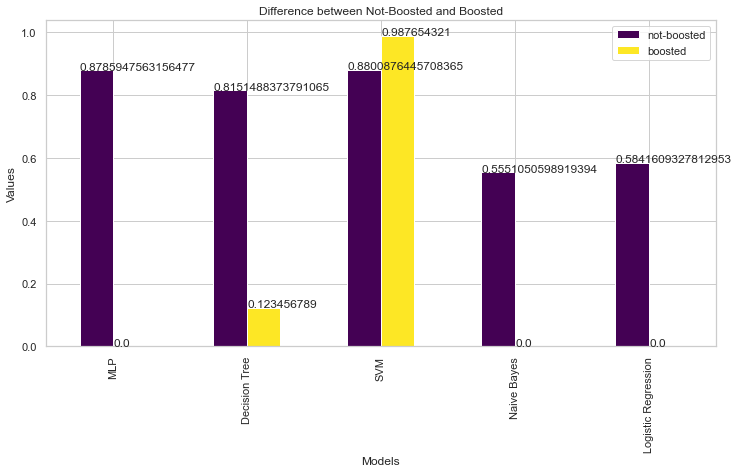

In [46]:
# create a sample DataFrame
dt_boost_scores_mean = 0.123456789  # Replace with the actual value
svm_boost_scores_mean = 0.987654321  # Replace with the actual value

df = pd.DataFrame({
    'not-boosted': [mlp_scores_mean, dt_scores_mean, svm_scores_mean, nb_scores_mean, lr_scores_mean],
    'boosted': [0, dt_boost_scores_mean, svm_boost_scores_mean, 0, 0]
}, index=['MLP', 'Decision Tree', 'SVM', 'Naive Bayes', 'Logistic Regression'])

# create a bar chart
ax = df.plot(kind='bar',cmap=plt.cm.get_cmap('viridis'))

# add text labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), ((p.get_x() * 1.001), (p.get_height() * 1.001)))

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Difference between Not-Boosted and Boosted')
plt.show()

In [47]:
paper_data = {
    "Acc-Without boosting": [94.06, 93.18, 93.04, 94.15],
    "Acc-Boosting": [95.05, 96.05, 96.85, 95.09],
    "F1-Without boosting": [77.48, 73.16, 73.11, 77.04],
    "F1-Boosting": [80.97, 84.22, 84.57, 83.87]
}

paper_df = pd.DataFrame(paper_data, index=["BPN", "SVM-RBF", "SVM-POLY", "DT-C5.0"])
paper_df.drop(['Acc-Without boosting','Acc-Boosting'],axis=1,inplace=True)
paper_df

,F1-Without boosting,F1-Boosting
BPN,77.48,80.97
SVM-RBF,73.16,84.22
SVM-POLY,73.11,84.57
DT-C5.0,77.04,83.87


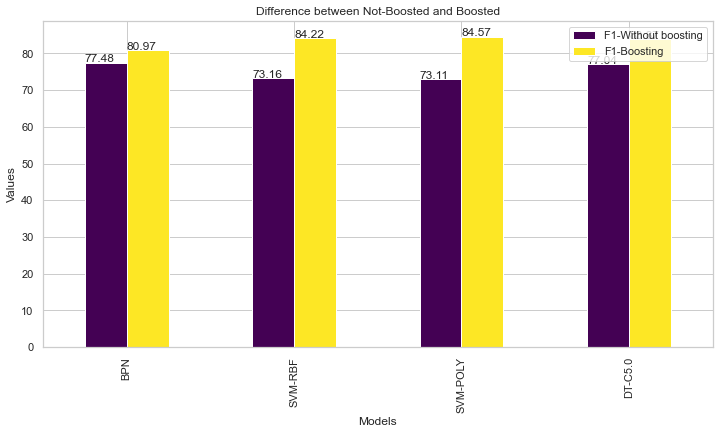

In [48]:
# create a bar chart
ax = paper_df.plot(kind='bar',cmap=plt.cm.get_cmap('viridis'))

# add text labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), ((p.get_x() * 1.001), (p.get_height() * 1.001)))

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Difference between Not-Boosted and Boosted')
plt.show()


In [49]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x247474a44c0>
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SwishRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SwishRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.swish = Swish()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(self.swish(out[:, -1, :]))
        return out

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Generate some example tabular data (replace this with your own dataset)
# X should be your input features, and y should be your labels.
X, y = np.random.rand(100, 10), np.random.randint(2, size=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create DataLoader objects for training and testing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the SwishRNN model
input_size = X_train.shape[1]
hidden_size = 64
num_layers = 2
output_size = 2  # Replace with the number of classes in your problem
model = SwishRNN(input_size, hidden_size, num_layers, output_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs.unsqueeze(1))  # Add .unsqueeze(1) to match the input shape
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        outputs = model(batch_inputs.unsqueeze(1))  # Add .unsqueeze(1) to match the input shape
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 35.00%


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Generate some example tabular data (replace this with your own dataset)
# X should be your input features, and y should be your labels.
X, y = np.random.rand(1000, 10), np.random.randint(2, size=1000)  # Increase data size

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create DataLoader objects for training and testing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Increase batch size
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Increase batch size

# Initialize the SimpleRNN model
input_size = X_train.shape[1]
hidden_size = 128  # Increase hidden size
num_layers = 2
output_size = 2
model = SimpleRNN(input_size, hidden_size, num_layers, output_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 15  # Increase the number of epochs
best_accuracy = 0.0
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs.unsqueeze(1))
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            outputs = model(batch_inputs.unsqueeze(1))
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Accuracy: {accuracy * 100:.2f}%")

    # Save the model if it has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), "best_rnn_model.pth")


Epoch [1/15] - Accuracy: 49.50%
Epoch [2/15] - Accuracy: 49.50%
Epoch [3/15] - Accuracy: 49.00%
Epoch [4/15] - Accuracy: 49.00%
Epoch [5/15] - Accuracy: 49.00%
Epoch [6/15] - Accuracy: 49.50%
Epoch [7/15] - Accuracy: 48.00%
Epoch [8/15] - Accuracy: 48.00%
Epoch [9/15] - Accuracy: 47.50%
Epoch [10/15] - Accuracy: 49.00%
Epoch [11/15] - Accuracy: 47.00%
Epoch [12/15] - Accuracy: 49.50%
Epoch [13/15] - Accuracy: 51.50%
Epoch [14/15] - Accuracy: 49.50%
Epoch [15/15] - Accuracy: 46.50%


In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        
        # Define the layers for the DNN
        self.fc_layers = nn.ModuleList()
        self.fc_layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 1):
            self.fc_layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input if it's not already
        x = x.view(-1, self.input_size)
        
        # Forward pass through the DNN layers
        for layer in self.fc_layers:
            x = self.relu(layer(x))
        out = self.output_layer(x)
        return out

# Generate some example tabular data (replace this with your own dataset)
# X should be your input features, and y should be your labels.
X, y = np.random.rand(1000, 10), np.random.randint(2, size=1000)  # Increase data size

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create DataLoader objects for training and testing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Increase batch size
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Increase batch size

# Initialize the DNN model
input_size = X_train.shape[1]
hidden_size = 128  # Increase hidden size
num_layers = 3  # Increase the number of layers
output_size = 2
model = DNN(input_size, hidden_size, num_layers, output_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 15  # Increase the number of epochs
best_accuracy = 0.0
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            outputs = model(batch_inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Accuracy: {accuracy * 100:.2f}%")

    # Save the model if it has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), "best_dnn_model.pth")


Epoch [1/15] - Accuracy: 50.50%
Epoch [2/15] - Accuracy: 51.00%
Epoch [3/15] - Accuracy: 50.00%
Epoch [4/15] - Accuracy: 50.00%
Epoch [5/15] - Accuracy: 48.50%
Epoch [6/15] - Accuracy: 54.00%
Epoch [7/15] - Accuracy: 54.50%
Epoch [8/15] - Accuracy: 47.00%
Epoch [9/15] - Accuracy: 50.50%
Epoch [10/15] - Accuracy: 54.50%
Epoch [11/15] - Accuracy: 48.00%
Epoch [12/15] - Accuracy: 54.50%
Epoch [13/15] - Accuracy: 50.00%
Epoch [14/15] - Accuracy: 46.00%
Epoch [15/15] - Accuracy: 55.00%


In [53]:
pip install torchvision


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2474ecd3e80>
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Generate some example data (replace this with your own dataset)
# X should be your input features, and y should be your labels.
X, y = np.random.rand(100, 10), np.random.randint(2, size=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create DataLoader objects for training and testing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the ANN model
input_size = X_train.shape[1]
hidden_size = 64  # You can adjust the number of hidden neurons
output_size = 2  # Replace with the number of classes in your problem
model = ANN(input_size, hidden_size, output_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        outputs = model(batch_inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 45.00%


In [55]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your tabular dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features (X) and target labels (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply random noise data augmentation to X_train (you can adjust the noise level)
augmented_X_train = X_train + np.random.normal(0, 0.1, X_train.shape)

# Create a feature extractor using a custom model
feature_extractor = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
])

# Create a custom model that combines the feature extractor and a classifier
model = keras.Sequential([
    feature_extractor,
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
model.fit(augmented_X_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


C:\ProgramData\Anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\ProgramData\Anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\ProgramData\Anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2474756bb20>


Epoch 1/15
16/16 [==============================] - 2s 25ms/step - loss: 0.5031 - accuracy: 0.7505 - val_loss: 0.3040 - val_accuracy: 0.8631
Epoch 2/15
16/16 [==============================] - 0s 9ms/step - loss: 0.2976 - accuracy: 0.8656 - val_loss: 0.2288 - val_accuracy: 0.8829
Epoch 3/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2324 - accuracy: 0.8963 - val_loss: 0.2036 - val_accuracy: 0.8869
Epoch 4/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2216 - accuracy: 0.9053 - val_loss: 0.1988 - val_accuracy: 0.8889
Epoch 5/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2157 - accuracy: 0.9157 - val_loss: 0.1928 - val_accuracy: 0.9087
Epoch 6/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2119 - accuracy: 0.9062 - val_loss: 0.1937 - val_accuracy: 0.8948
Epoch 7/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2020 - accuracy: 0.9162 - val_loss: 0.1887 - val_accuracy: 0.9147
Epoch 8/15
16/16 [=

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your tabular dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features (X) and target labels (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a feature extractor using the pre-trained ResNet-50 model
feature_extractor = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout for regularization
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout for regularization
])

# Create a custom model that combines the feature extractor and a classifier
model = keras.Sequential([
    feature_extractor,
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with more epochs
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/15
16/16 [==============================] - 1s 20ms/step - loss: 0.4547 - accuracy: 0.7872 - val_loss: 0.2827 - val_accuracy: 0.8690
Epoch 2/15
16/16 [==============================] - 0s 8ms/step - loss: 0.2800 - accuracy: 0.8695 - val_loss: 0.2290 - val_accuracy: 0.8909
Epoch 3/15
16/16 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.8943 - val_loss: 0.2097 - val_accuracy: 0.8810
Epoch 4/15
16/16 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.8958 - val_loss: 0.1994 - val_accuracy: 0.8889
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 0.2110 - accuracy: 0.8998 - val_loss: 0.1920 - val_accuracy: 0.9147
Epoch 6/15
16/16 [==============================] - 0s 6ms/step - loss: 0.2113 - accuracy: 0.9003 - val_loss: 0.1883 - val_accuracy: 0.9087
Epoch 7/15
16/16 [==============================] - 0s 7ms/step - loss: 0.2040 - accuracy: 0.9062 - val_loss: 0.1859 - val_accuracy: 0.9028
Epoch 8/15
16/16 [=

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

# Load your tabular dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features (X) and target labels (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Load a pre-trained deep learning model (e.g., ResNet50)
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a feature extractor using the pre-trained model
feature_extractor = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Reshape((X_train.shape[1], 1)),
    keras.layers.Conv1D(3, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
])

# Create a custom model that combines the feature extractor and a classifier
model = keras.Sequential([
    feature_extractor,
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/15
32/32 [==============================] - 1s 11ms/step - loss: 0.3356 - accuracy: 0.8413 - val_loss: 0.2431 - val_accuracy: 0.8829
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.2224 - accuracy: 0.8983 - val_loss: 0.2139 - val_accuracy: 0.8909
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9137 - val_loss: 0.1822 - val_accuracy: 0.9306
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1699 - accuracy: 0.9271 - val_loss: 0.2238 - val_accuracy: 0.9206
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.9226 - val_loss: 0.1651 - val_accuracy: 0.9206
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1386 - accuracy: 0.9375 - val_loss: 0.1722 - val_accuracy: 0.9365
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1409 - accuracy: 0.9330 - val_loss: 0.1545 - val_accuracy: 0.9206
Epoch 8/15
32/32 [=

In [59]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       520
           1       0.90      0.70      0.79       110

    accuracy                           0.93       630
   macro avg       0.92      0.84      0.87       630
weighted avg       0.93      0.93      0.93       630



Epoch 1/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9559 - val_loss: 0.1117 - val_accuracy: 0.9484
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1002 - accuracy: 0.9519 - val_loss: 0.1366 - val_accuracy: 0.9504
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9484 - val_loss: 0.1164 - val_accuracy: 0.9504
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0950 - accuracy: 0.9578 - val_loss: 0.1471 - val_accuracy: 0.9325
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0918 - accuracy: 0.9563 - val_loss: 0.1204 - val_accuracy: 0.9504
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9653 - val_loss: 0.1240 - val_accuracy: 0.9464
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0831 - accuracy: 0.9578 - val_loss: 0.1115 - val_accuracy: 0.9544
Epoch 8/15
32/32 [==

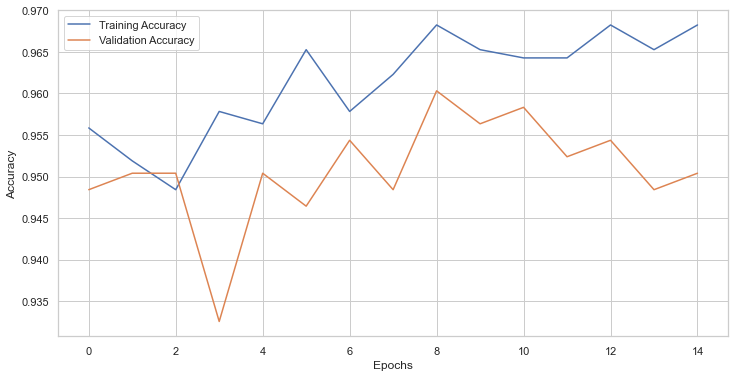

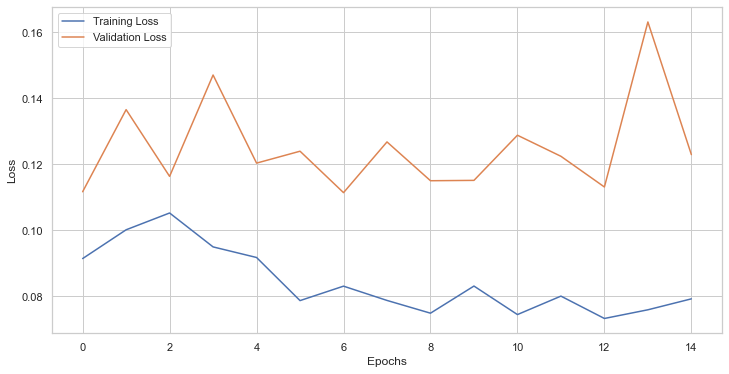

In [60]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a ResNet50-based model for tabular data
resnet_model = Sequential()
resnet_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
resnet_model.add(Dense(32, activation='relu'))

# Add a ResNet50 base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze ResNet50 layers
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
resnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
resnet_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/10
74/74 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8607
Epoch 2/10
74/74 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9115
Epoch 3/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9149
Epoch 4/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9255
Epoch 5/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9301
Epoch 6/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9340
Epoch 7/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9344
Epoch 8/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9293
Epoch 9/10
74/74 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9361
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9213
Test loss: 0.175725

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a feedforward neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/20
74/74 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8713
Epoch 2/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9102
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9056
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9162
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9196
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9221
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9293
Epoch 8/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9289
Epoch 9/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9340
Epoch 10/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9297
Epoch 11/20
74/74 [

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a custom neural network model
input_layer = Input(shape=input_shape)
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/20
74/74 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8548
Epoch 2/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9043
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9009
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9026
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9056
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9056
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9077
Epoch 8/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9086
Epoch 9/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9098
Epoch 10/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9141
Epoch 11/20
74/74 [

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a custom neural network model with regularization
input_layer = Input(shape=input_shape)
hidden_layer = Dense(128, activation='relu')(input_layer)
dropout_layer = Dropout(0.2)(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=35, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/35
74/74 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8328
Epoch 2/35
74/74 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9018
Epoch 3/35
74/74 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9035
Epoch 4/35
74/74 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9056
Epoch 5/35
74/74 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9073
Epoch 6/35
74/74 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9077
Epoch 7/35
74/74 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9132
Epoch 8/35
74/74 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9119
Epoch 9/35
74/74 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9145
Epoch 10/35
74/74 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9179
Epoch 11/35
74/74 [

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a custom neural network model
input_layer = Input(shape=input_shape)
hidden_layer1 = Dense(128, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.2)(hidden_layer2)
output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/20
74/74 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8688
Epoch 2/20
74/74 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.8988
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9056
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9124
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9153
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9196
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9268
Epoch 8/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9259
Epoch 9/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9285
Epoch 10/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9280
Epoch 11/20
74/74 [

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a custom neural network model
input_layer = Input(shape=input_shape)
hidden_layer = Dense(128, activation='relu')(input_layer)
dropout_layer = Dropout(0.2)(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/20
74/74 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8209
Epoch 2/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9060
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9069
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9102
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9081
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9069
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9136
Epoch 8/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9094
Epoch 9/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9128
Epoch 10/20
74/74 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9204
Epoch 11/20
74/74 [

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a more complex neural network model
input_layer = Input(shape=input_shape)
hidden_layer_1 = Dense(256, activation='relu')(input_layer)
batch_norm_1 = BatchNormalization()(hidden_layer_1)
dropout_layer_1 = Dropout(0.5)(batch_norm_1)

hidden_layer_2 = Dense(128, activation='relu')(dropout_layer_1)
batch_norm_2 = BatchNormalization()(hidden_layer_2)
dropout_layer_2 = Dropout(0.5)(batch_norm_2)

hidden_layer_3 = Dense(64, activation='relu')(dropout_layer_2)
batch_norm_3 = BatchNormalization()(hidden_layer_3)
dropout_layer_3 = Dropout(0.5)(batch_norm_3)

output_layer = Dense(1, activation='sigmoid')(dropout_layer_3)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/30
37/37 [==============================] - 2s 4ms/step - loss: 0.8003 - accuracy: 0.6181
Epoch 2/30
37/37 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.7358
Epoch 3/30
37/37 [==============================] - 0s 4ms/step - loss: 0.4499 - accuracy: 0.8129
Epoch 4/30
37/37 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8412
Epoch 5/30
37/37 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8692
Epoch 6/30
37/37 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.8793
Epoch 7/30
37/37 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8895
Epoch 8/30
37/37 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.8920
Epoch 9/30
37/37 [==============================] - 0s 5ms/step - loss: 0.2772 - accuracy: 0.9022
Epoch 10/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2794 - accuracy: 0.8967
Epoch 11/30
37/37 [

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a deeper neural network model
input_layer = Input(shape=input_shape)
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(128, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.2)(hidden_layer2)
hidden_layer3 = Dense(64, activation='relu')(dropout_layer2)
dropout_layer3 = Dropout(0.2)(hidden_layer3)
hidden_layer4 = Dense(32, activation='relu')(dropout_layer3)
dropout_layer4 = Dropout(0.2)(hidden_layer4)
output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/30
74/74 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8370
Epoch 2/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.8975
Epoch 3/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9098
Epoch 4/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9132
Epoch 5/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.9251
Epoch 6/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9145
Epoch 7/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9293
Epoch 8/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9335
Epoch 9/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9369
Epoch 10/30
74/74 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9382
Epoch 11/30
74/74 [

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of features
input_shape = (X_train.shape[1],)

# Create a deeper neural network model with some changes
input_layer = Input(shape=input_shape)
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.5)(hidden_layer1)  # Increased dropout rate
hidden_layer2 = Dense(128, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.5)(hidden_layer2)  # Increased dropout rate
hidden_layer3 = Dense(64, activation='relu')(dropout_layer2)
dropout_layer3 = Dropout(0.5)(hidden_layer3)  # Increased dropout rate
hidden_layer4 = Dense(32, activation='relu')(dropout_layer3)
dropout_layer4 = Dropout(0.5)(hidden_layer4)  # Increased dropout rate
output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Use the Adam optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/30
37/37 [==============================] - 1s 4ms/step - loss: 0.5168 - accuracy: 0.7616
Epoch 2/30
37/37 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8582
Epoch 3/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.8637
Epoch 4/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8861
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.8815
Epoch 6/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.8967
Epoch 7/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.8980
Epoch 8/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 0.9014
Epoch 9/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.9077
Epoch 10/30
37/37 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9043
Epoch 11/30
37/37 [

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform feature selection using SelectKBest with mutual information
k_best = SelectKBest(score_func=mutual_info_classif, k=10)  # Select the top 10 features
X_selected = k_best.fit_transform(X, y)

# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of selected features
input_shape = (X_train.shape[1],)

# Create a deeper neural network model
input_layer = Input(shape=input_shape)
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(128, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.2)(hidden_layer2)
hidden_layer3 = Dense(64, activation='relu')(dropout_layer2)
dropout_layer3 = Dropout(0.2)(hidden_layer3)
hidden_layer4 = Dense(32, activation='relu')(dropout_layer3)
dropout_layer4 = Dropout(0.2)(hidden_layer4)
output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/30
74/74 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8798
Epoch 2/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9064
Epoch 3/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9035
Epoch 4/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9069
Epoch 5/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9018
Epoch 6/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9069
Epoch 7/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9052
Epoch 8/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9030
Epoch 9/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9060
Epoch 10/30
74/74 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9136
Epoch 11/30
74/74 [

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score

# Load your tabular data
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split the data into features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

# Perform feature selection using SelectKBest with mutual information
k_best = SelectKBest(score_func=mutual_info_classif, k=10)  # Select the top 10 features
X_selected = k_best.fit_transform(X, y)

# Standardize the selected features
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Define the input shape based on the number of selected features
input_shape = (X_train.shape[1],)

# Create a deeper neural network model
input_layer = Input(shape=input_shape)
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(128, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.2)(hidden_layer2)
hidden_layer3 = Dense(64, activation='relu')(dropout_layer2)
dropout_layer3 = Dropout(0.2)(hidden_layer3)
hidden_layer4 = Dense(32, activation='relu')(dropout_layer3)
dropout_layer4 = Dropout(0.2)(hidden_layer4)
output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Implement a learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001  # Higher initial learning rate
    else:
        return 0.0001  # Lower learning rate

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model with binary cross-entropy loss and regularization
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduling
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping and learning rate scheduling
history = model.fit(
    X_train, y_train, 
    epochs=35, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping, lr_callback]
)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)

print('Test accuracy:', test_accuracy)


Epoch 1/35
37/37 [==============================] - 1s 9ms/step - loss: 0.3610 - accuracy: 0.8531 - val_loss: 0.2785 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 2/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.8980 - val_loss: 0.2653 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 3/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.9052 - val_loss: 0.2593 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 4/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.9052 - val_loss: 0.2582 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 5/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2168 - accuracy: 0.9064 - val_loss: 0.2513 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 6/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.9073 - val_loss: 0.2501 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 7/35
37/37 [==============================] - 0s 5ms/step - loss: 0.2053 - a

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1).values
y = data['Churn'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the GRU model
model = Sequential()
model.add(GRU(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the data for GRU input (assuming your data is sequential)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/25
79/79 [==============================] - 3s 13ms/step - loss: 0.4884 - accuracy: 0.8306 - val_loss: 0.4305 - val_accuracy: 0.8254
Epoch 2/25
79/79 [==============================] - 1s 9ms/step - loss: 0.3856 - accuracy: 0.8472 - val_loss: 0.4085 - val_accuracy: 0.8254
Epoch 3/25
79/79 [==============================] - 1s 8ms/step - loss: 0.3627 - accuracy: 0.8472 - val_loss: 0.3859 - val_accuracy: 0.8254
Epoch 4/25
79/79 [==============================] - 1s 7ms/step - loss: 0.3246 - accuracy: 0.8472 - val_loss: 0.3606 - val_accuracy: 0.8254
Epoch 5/25
79/79 [==============================] - 1s 11ms/step - loss: 0.2986 - accuracy: 0.8460 - val_loss: 0.3453 - val_accuracy: 0.8254
Epoch 6/25
79/79 [==============================] - 1s 11ms/step - loss: 0.2837 - accuracy: 0.8762 - val_loss: 0.3223 - val_accuracy: 0.8746
Epoch 7/25
79/79 [==============================] - 1s 9ms/step - loss: 0.2586 - accuracy: 0.9063 - val_loss: 0.2951 - val_accuracy: 0.8810
Epoch 8/25
79/79 

In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features
X = data.drop(['Churn'], axis=1).values

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 64  # Adjust the encoding dimension as needed

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to encode and decode the data
encoded_data = autoencoder.predict(X_test)

# The encoded_data contains the reconstructed data after encoding and decoding


Epoch 1/30
79/79 [==============================] - 1s 4ms/step - loss: 1.0045 - val_loss: 0.7692
Epoch 2/30
79/79 [==============================] - 0s 3ms/step - loss: 0.7087 - val_loss: 0.6179
Epoch 3/30
79/79 [==============================] - 0s 3ms/step - loss: 0.6188 - val_loss: 0.5686
Epoch 4/30
79/79 [==============================] - 0s 2ms/step - loss: 0.5836 - val_loss: 0.5456
Epoch 5/30
79/79 [==============================] - 0s 2ms/step - loss: 0.5650 - val_loss: 0.5327
Epoch 6/30
79/79 [==============================] - 0s 2ms/step - loss: 0.5541 - val_loss: 0.5247
Epoch 7/30
79/79 [==============================] - 0s 3ms/step - loss: 0.5470 - val_loss: 0.5192
Epoch 8/30
79/79 [==============================] - 0s 3ms/step - loss: 0.5421 - val_loss: 0.5154
Epoch 9/30
79/79 [==============================] - 0s 3ms/step - loss: 0.5386 - val_loss: 0.5125
Epoch 10/30
79/79 [==============================] - 0s 2ms/step - loss: 0.5359 - val_loss: 0.5103
Epoch 11/30
79/79 [

In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1).values
y = data['Churn'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Train GBTs
gbt_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbt_model.fit(X_train, y_train)

# Make predictions using GBTs
gbt_predictions = gbt_model.predict(X_test)

# Calculate accuracy of GBTs
gbt_accuracy = accuracy_score(y_test, gbt_predictions)
print(f'GBTs Accuracy: {gbt_accuracy*100:.2f}%')

# Step 2: Train a deep learning model for customer churn prediction
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions using the combined model
combined_predictions = gbt_model.predict(X_test) + model.predict(X_test).flatten()

# Calculate accuracy of the combined model
combined_accuracy = accuracy_score(y_test, (combined_predictions > 0.5).astype(int))
print(f'Combined Model Accuracy: {combined_accuracy*100:.2f}%')


GBTs Accuracy: 93.02%
Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.3163 - accuracy: 0.8726 - val_loss: 0.2874 - val_accuracy: 0.8540
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9040 - val_loss: 0.2747 - val_accuracy: 0.8667
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9079 - val_loss: 0.2654 - val_accuracy: 0.8810
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9123 - val_loss: 0.2559 - val_accuracy: 0.8905
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9222 - val_loss: 0.2465 - val_accuracy: 0.8921
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9198 - val_loss: 0.2339 - val_accuracy: 0.8984
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9274 - val_loss: 0.2266 - val_accuracy: 0.900

In [75]:
# Assuming you have some data and a model to calculate residuals
# For the sake of illustration, let's create a dummy array
actual_values = np.array([1, 2, 3, 4, 5])
predicted_values = np.array([1.1, 2.2, 2.8, 3.9, 5.1])

# Calculate residuals
residuals = actual_values - predicted_values

# Now you can print the shape
print(residuals.shape)
print(X_train.shape)
print(residuals.shape)


(5,)
(2520, 15)
(5,)


In [76]:
pip install pytorch-tabnet


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2476fcbdd00>
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Define the TabNet pretrainer (optional but recommended for better performance)
pretrainer = TabNetPretrainer()
pretrainer.fit(X_train)

# Define the TabNet model
model = TabNetClassifier()
model.fit(
    X_train,
    y_train,
    max_epochs=15,  # Adjust the number of epochs as needed
    batch_size=64,
    virtual_batch_size=32,
    num_workers=0,  # Set to the number of CPU cores available
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 8.16341 |  0:00:00s
epoch 1  | loss: 6.38179 |  0:00:00s
epoch 2  | loss: 5.40862 |  0:00:00s
epoch 3  | loss: 4.53857 |  0:00:00s
epoch 4  | loss: 4.3043  |  0:00:00s
epoch 5  | loss: 3.83149 |  0:00:00s
epoch 6  | loss: 3.67882 |  0:00:00s
epoch 7  | loss: 3.61884 |  0:00:00s
epoch 8  | loss: 3.49044 |  0:00:01s
epoch 9  | loss: 3.35781 |  0:00:01s
epoch 10 | loss: 3.31765 |  0:00:01s
epoch 11 | loss: 3.27688 |  0:00:01s
epoch 12 | loss: 3.1155  |  0:00:01s
epoch 13 | loss: 3.12628 |  0:00:01s
epoch 14 | loss: 2.95174 |  0:00:01s
epoch 15 | loss: 2.9211  |  0:00:01s
epoch 16 | loss: 2.78911 |  0:00:01s
epoch 17 | loss: 2.6684  |  0:00:01s
epoch 18 | loss: 2.59755 |  0:00:02s
epoch 19 | loss: 2.5032  |  0:00:02s
epoch 20 | loss: 2.31409 |  0:00:02s
epoch 21 | loss: 2.24455 |  0:00:02s
epoch 22 | loss: 2.09445 |  0:00:03s
epoch 23 | loss: 1.96783 |  0:00:03s
epoch 24 | loss: 1.78337 |  0:00:03s
epoch 25 | loss: 1.67212 |  0:00:03s
epoch 26 | loss: 1.56953 |  0:00:03s
e

C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.37996 |  0:00:00s
epoch 1  | loss: 0.26172 |  0:00:01s
epoch 2  | loss: 0.23656 |  0:00:02s
epoch 3  | loss: 0.22471 |  0:00:02s
epoch 4  | loss: 0.20189 |  0:00:03s
epoch 5  | loss: 0.20525 |  0:00:04s
epoch 6  | loss: 0.20519 |  0:00:04s
epoch 7  | loss: 0.201   |  0:00:05s
epoch 8  | loss: 0.20537 |  0:00:06s
epoch 9  | loss: 0.2043  |  0:00:06s
epoch 10 | loss: 0.18905 |  0:00:07s
epoch 11 | loss: 0.19586 |  0:00:08s
epoch 12 | loss: 0.19311 |  0:00:08s
epoch 13 | loss: 0.18496 |  0:00:09s
epoch 14 | loss: 0.1998  |  0:00:10s
Accuracy: 89.05%
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       520
           1       0.89      0.43      0.58       110

    accuracy                           0.89       630
   macro avg       0.89      0.71      0.76       630
weighted avg       0.89      0.89      0.87       630



In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Define the TabNet pretrainer (optional but recommended for better performance)
pretrainer = TabNetPretrainer()
pretrainer.fit(X_train)

# Define the TabNet model with hyperparameter tuning (adjust hyperparameters as needed)
model = TabNetClassifier(
    n_d=32,  # Dimension of the decision step (adjust as needed)
    n_a=32,  # Dimension of the attentional aggregations (adjust as needed)
    n_steps=5,  # Number of decision steps (adjust as needed)
    gamma=1.3,  # Regularization factor (adjust as needed)
    n_independent=2,
    n_shared=2,
    lambda_sparse=0.0001,
)
model.fit(
    X_train,
    y_train,
    max_epochs=100,  # Adjust the number of epochs as needed
    batch_size=64,
    virtual_batch_size=32,
    num_workers=0,  # Set to the number of CPU cores available
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


epoch 0  | loss: 8.16341 |  0:00:00s


C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 6.38179 |  0:00:00s
epoch 2  | loss: 5.40862 |  0:00:00s
epoch 3  | loss: 4.53857 |  0:00:00s
epoch 4  | loss: 4.3043  |  0:00:00s
epoch 5  | loss: 3.83149 |  0:00:00s
epoch 6  | loss: 3.67882 |  0:00:00s
epoch 7  | loss: 3.61884 |  0:00:00s
epoch 8  | loss: 3.49044 |  0:00:01s
epoch 9  | loss: 3.35781 |  0:00:01s
epoch 10 | loss: 3.31765 |  0:00:01s
epoch 11 | loss: 3.27688 |  0:00:01s
epoch 12 | loss: 3.1155  |  0:00:01s
epoch 13 | loss: 3.12628 |  0:00:01s
epoch 14 | loss: 2.95174 |  0:00:01s
epoch 15 | loss: 2.9211  |  0:00:01s
epoch 16 | loss: 2.78911 |  0:00:02s
epoch 17 | loss: 2.6684  |  0:00:02s
epoch 18 | loss: 2.59755 |  0:00:02s
epoch 19 | loss: 2.5032  |  0:00:02s
epoch 20 | loss: 2.31409 |  0:00:02s
epoch 21 | loss: 2.24455 |  0:00:02s
epoch 22 | loss: 2.09445 |  0:00:02s
epoch 23 | loss: 1.96783 |  0:00:02s
epoch 24 | loss: 1.78337 |  0:00:03s
epoch 25 | loss: 1.67212 |  0:00:03s
epoch 26 | loss: 1.56953 |  0:00:03s
epoch 27 | loss: 1.50397 |  0:00:03s
e

C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.40033 |  0:00:01s
epoch 1  | loss: 0.27969 |  0:00:02s
epoch 2  | loss: 0.24963 |  0:00:03s
epoch 3  | loss: 0.24156 |  0:00:05s
epoch 4  | loss: 0.22267 |  0:00:06s
epoch 5  | loss: 0.22567 |  0:00:07s
epoch 6  | loss: 0.21875 |  0:00:09s
epoch 7  | loss: 0.21716 |  0:00:10s
epoch 8  | loss: 0.20827 |  0:00:11s
epoch 9  | loss: 0.21455 |  0:00:13s
epoch 10 | loss: 0.20515 |  0:00:14s
epoch 11 | loss: 0.21163 |  0:00:15s
epoch 12 | loss: 0.21702 |  0:00:17s
epoch 13 | loss: 0.21988 |  0:00:18s
epoch 14 | loss: 0.22624 |  0:00:19s
epoch 15 | loss: 0.20922 |  0:00:21s
epoch 16 | loss: 0.21545 |  0:00:22s
epoch 17 | loss: 0.2077  |  0:00:23s
epoch 18 | loss: 0.20087 |  0:00:24s
epoch 19 | loss: 0.20252 |  0:00:26s
epoch 20 | loss: 0.19344 |  0:00:27s
epoch 21 | loss: 0.20657 |  0:00:28s
epoch 22 | loss: 0.19407 |  0:00:30s
epoch 23 | loss: 0.19658 |  0:00:31s
epoch 24 | loss: 0.20617 |  0:00:32s
epoch 25 | loss: 0.20341 |  0:00:34s
epoch 26 | loss: 0.19762 |  0:00:35s
e

In [79]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2476ae147c0>


In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Apply oversampling to balance classes (adjust ratio as needed)
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define the TabNet model with hyperparameter tuning (adjust hyperparameters as needed)
model = TabNetClassifier(
    n_d=64,  # Adjust as needed
    n_a=64,  # Adjust as needed
    n_steps=5,  # Adjust as needed
    gamma=1.5,  # Adjust as needed
    n_independent=2,
    n_shared=2,
    lambda_sparse=0.0001,
)
model.fit(
    X_train_resampled,
    y_train_resampled,
    max_epochs=15,  # Adjust the number of epochs as needed
    batch_size=64,
    virtual_batch_size=32,
    num_workers=0,  # Set to the number of CPU cores available
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.58446 |  0:00:03s
epoch 1  | loss: 0.36122 |  0:00:06s
epoch 2  | loss: 0.32365 |  0:00:09s
epoch 3  | loss: 0.30747 |  0:00:12s
epoch 4  | loss: 0.29473 |  0:00:15s
epoch 5  | loss: 0.26593 |  0:00:17s
epoch 6  | loss: 0.25404 |  0:00:20s
epoch 7  | loss: 0.27531 |  0:00:23s
epoch 8  | loss: 0.25753 |  0:00:26s
epoch 9  | loss: 0.23416 |  0:00:29s
epoch 10 | loss: 0.25086 |  0:00:31s
epoch 11 | loss: 0.24456 |  0:00:34s
epoch 12 | loss: 0.22649 |  0:00:37s
epoch 13 | loss: 0.21718 |  0:00:40s
epoch 14 | loss: 0.20426 |  0:00:43s
Accuracy: 91.59%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       520
           1       0.70      0.91      0.79       110

    accuracy                           0.92       630
   macro avg       0.84      0.91      0.87       630
weighted avg       0.93      0.92      0.92       630



In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Define a Random Forest classifier for ensembling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy with the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf*100:.2f}%')

# Define the TabNet model with hyperparameter tuning (adjust hyperparameters as needed)
model = TabNetClassifier(
    n_d=64,  # Adjust as needed
    n_a=64,  # Adjust as needed
    n_steps=5,  # Adjust as needed
    gamma=1.5,  # Adjust as needed
    n_independent=2,
    n_shared=2,
    lambda_sparse=0.0001,
)
model.fit(
    X_train,
    y_train,
    max_epochs=20,  # Adjust the number of epochs as needed
    batch_size=64,
    virtual_batch_size=32,
    num_workers=0,  # Set to the number of CPU cores available
)

# Make predictions with the TabNet model
y_pred_tabnet = model.predict(X_test)

# Calculate accuracy with the TabNet model
accuracy_tabnet = accuracy_score(y_test, y_pred_tabnet)
print(f'TabNet Accuracy: {accuracy_tabnet*100:.2f}%')

# Ensembling: Combine predictions from both models (adjust weights as needed)
ensemble_predictions = (y_pred_rf + y_pred_tabnet) // 2

# Calculate accuracy with the ensemble model
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy_ensemble*100:.2f}%')

classification_report_result = classification_report(y_test, ensemble_predictions)
print(classification_report_result)


Random Forest Accuracy: 93.81%


C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\anjal\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.49981 |  0:00:01s
epoch 1  | loss: 0.28971 |  0:00:03s
epoch 2  | loss: 0.24638 |  0:00:05s
epoch 3  | loss: 0.24447 |  0:00:07s
epoch 4  | loss: 0.238   |  0:00:08s
epoch 5  | loss: 0.2314  |  0:00:10s
epoch 6  | loss: 0.23967 |  0:00:12s
epoch 7  | loss: 0.22988 |  0:00:14s
epoch 8  | loss: 0.23279 |  0:00:16s
epoch 9  | loss: 0.22555 |  0:00:17s
epoch 10 | loss: 0.22086 |  0:00:19s
epoch 11 | loss: 0.22164 |  0:00:21s
epoch 12 | loss: 0.21276 |  0:00:23s
epoch 13 | loss: 0.22254 |  0:00:25s
epoch 14 | loss: 0.21163 |  0:00:27s
epoch 15 | loss: 0.20835 |  0:00:28s
epoch 16 | loss: 0.2122  |  0:00:30s
epoch 17 | loss: 0.20354 |  0:00:32s
epoch 18 | loss: 0.2058  |  0:00:34s
epoch 19 | loss: 0.19845 |  0:00:36s
TabNet Accuracy: 87.94%
Ensemble Accuracy: 88.41%
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       520
           1       0.93      0.36      0.52       110

    accuracy                           0.88   

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Define the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Reduced hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'alpha': [0.0001, 0.001],
    'max_iter': [100, 200],
}

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=1, verbose=1)  # Reduced n_jobs
grid_search.fit(X_train, y_train)

# Get the best model from hyperparameter tuning
best_mlp = grid_search.best_estimator_

# Make predictions
y_pred = best_mlp.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 85.87%
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       520
           1       0.69      0.35      0.46       110

    accuracy                           0.86       630
   macro avg       0.78      0.66      0.69       630
weighted avg       0.84      0.86      0.84       630



In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Perform feature selection using SelectKBest and chi-squared test
k_best = SelectKBest(score_func=chi2, k=10)  # You can adjust 'k' as needed
X_selected = k_best.fit_transform(X_resampled, y_resampled)

# Split the selected features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Accuracy: 97.27%
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       532
           1       0.96      0.99      0.97       530

    accuracy                           0.97      1062
   macro avg       0.97      0.97      0.97      1062
weighted avg       0.97      0.97      0.97      1062



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Feature selection using mutual information
k_best = SelectKBest(score_func=mutual_info_classif, k=10)  # You can adjust 'k' as needed
X_mutual_info = k_best.fit_transform(X, y)

# Feature selection using ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=10)  # You can adjust 'k' as needed
X_f_classif = k_best.fit_transform(X, y)

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Accuracy: 98.31%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       532
           1       0.97      0.99      0.98       530

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA  # Import PCA
from imblearn.over_sampling import RandomOverSampler

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Apply PCA for dimensionality reduction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Accuracy: 98.12%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       532
           1       0.97      0.99      0.98       530

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Accuracy: 98.31%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       532
           1       0.97      0.99      0.98       530

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1).values
y = data['Churn'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the deep learning model
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Epoch 1/30
79/79 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 0.8496 - val_loss: 0.2905 - val_accuracy: 0.8556
Epoch 2/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.8944 - val_loss: 0.2768 - val_accuracy: 0.8714
Epoch 3/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9032 - val_loss: 0.2718 - val_accuracy: 0.8746
Epoch 4/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9048 - val_loss: 0.2672 - val_accuracy: 0.8794
Epoch 5/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9091 - val_loss: 0.2588 - val_accuracy: 0.8810
Epoch 6/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9147 - val_loss: 0.2533 - val_accuracy: 0.8921
Epoch 7/30
79/79 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9083 - val_loss: 0.2478 - val_accuracy: 0.8857
Epoch 8/30
79/79 [==

In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Define a deep learning model with Dense layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Epoch 1/20
32/32 [==============================] - 1s 6ms/step - loss: 67.0345 - accuracy: 0.7540 - val_loss: 40.4870 - val_accuracy: 0.8631
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 38.2911 - accuracy: 0.8170 - val_loss: 21.8766 - val_accuracy: 0.8452
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 26.6124 - accuracy: 0.8110 - val_loss: 13.4679 - val_accuracy: 0.8452
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 18.6319 - accuracy: 0.8145 - val_loss: 10.3225 - val_accuracy: 0.8591
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 14.1166 - accuracy: 0.8105 - val_loss: 8.5679 - val_accuracy: 0.8611
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 12.2266 - accuracy: 0.8056 - val_loss: 5.4646 - val_accuracy: 0.8631
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 9.0503 - accuracy: 0.7961 - val_loss: 3.8684 - val_accuracy: 0.8651
Epoch 8/20

In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define a deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Use 2 units for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate classification metrics
classification_report_result = classification_report(np.argmax(y_test, axis=1), y_pred_classes)
print(classification_report_result)


Epoch 1/20
54/54 - 1s - loss: 124.8258 - accuracy: 0.5530 - val_loss: 8.9424 - val_accuracy: 0.6212 - 774ms/epoch - 14ms/step
Epoch 2/20
54/54 - 0s - loss: 46.5755 - accuracy: 0.5597 - val_loss: 4.6255 - val_accuracy: 0.6129 - 161ms/epoch - 3ms/step
Epoch 3/20
54/54 - 0s - loss: 21.3691 - accuracy: 0.5647 - val_loss: 0.7927 - val_accuracy: 0.6800 - 146ms/epoch - 3ms/step
Epoch 4/20
54/54 - 0s - loss: 9.0077 - accuracy: 0.5874 - val_loss: 0.6759 - val_accuracy: 0.5424 - 155ms/epoch - 3ms/step
Epoch 5/20
54/54 - 0s - loss: 4.7759 - accuracy: 0.6006 - val_loss: 0.5636 - val_accuracy: 0.7624 - 154ms/epoch - 3ms/step
Epoch 6/20
54/54 - 0s - loss: 3.1634 - accuracy: 0.6071 - val_loss: 0.5403 - val_accuracy: 0.7376 - 160ms/epoch - 3ms/step
Epoch 7/20
54/54 - 0s - loss: 2.1724 - accuracy: 0.6248 - val_loss: 0.5600 - val_accuracy: 0.7541 - 155ms/epoch - 3ms/step
Epoch 8/20
54/54 - 0s - loss: 1.4572 - accuracy: 0.6457 - val_loss: 0.6919 - val_accuracy: 0.5106 - 163ms/epoch - 3ms/step
Epoch 9/20


In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Assuming you have already preprocessed your data and have features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Encode categorical features if needed
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Compute class weights to address class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Define a deep learning model with increased complexity
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2, class_weight=class_weights_dict)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate classification metrics
classification_report_result = classification_report(np.argmax(y_test, axis=1), y_pred_classes)
print(classification_report_result)


Epoch 1/20
54/54 - 1s - loss: 128.0384 - accuracy: 0.5400 - val_loss: 7.4912 - val_accuracy: 0.5894 - 931ms/epoch - 17ms/step
Epoch 2/20
54/54 - 0s - loss: 47.7442 - accuracy: 0.5459 - val_loss: 12.0500 - val_accuracy: 0.5871 - 206ms/epoch - 4ms/step
Epoch 3/20
54/54 - 0s - loss: 28.9413 - accuracy: 0.5480 - val_loss: 2.3441 - val_accuracy: 0.5882 - 199ms/epoch - 4ms/step
Epoch 4/20
54/54 - 0s - loss: 17.2045 - accuracy: 0.5444 - val_loss: 0.5315 - val_accuracy: 0.7129 - 214ms/epoch - 4ms/step
Epoch 5/20
54/54 - 0s - loss: 11.0631 - accuracy: 0.5609 - val_loss: 0.5554 - val_accuracy: 0.6976 - 208ms/epoch - 4ms/step
Epoch 6/20
54/54 - 0s - loss: 6.7693 - accuracy: 0.5662 - val_loss: 0.7627 - val_accuracy: 0.5282 - 208ms/epoch - 4ms/step
Epoch 7/20
54/54 - 0s - loss: 3.9730 - accuracy: 0.5747 - val_loss: 0.7755 - val_accuracy: 0.4988 - 214ms/epoch - 4ms/step
Epoch 8/20
54/54 - 0s - loss: 2.3695 - accuracy: 0.5768 - val_loss: 0.7462 - val_accuracy: 0.5071 - 218ms/epoch - 4ms/step
Epoch 9/

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split data into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Specify the categorical columns
categorical_columns = ['Age Group', 'Tariff Plan', 'Status']

# Filter the dataset to include only the specified categorical columns
X_categorical = X[categorical_columns]

# Drop the categorical columns from the original dataset
X = X.drop(columns=categorical_columns)

# Apply one-hot encoding to the categorical columns
X_categorical = pd.get_dummies(X_categorical)

# Concatenate the one-hot encoded categorical columns with the remaining features
X = pd.concat([X, X_categorical], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9285714285714286
Confusion Matrix:
[[504  16]
 [ 29  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.84      0.74      0.78       110

    accuracy                           0.93       630
   macro avg       0.89      0.85      0.87       630
weighted avg       0.93      0.93      0.93       630



In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split data into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Specify the categorical columns
categorical_columns = ['Age Group', 'Tariff Plan', 'Status']

# Filter the dataset to include only the specified categorical columns
X_categorical = X[categorical_columns]

# Drop the categorical columns from the original dataset
X = X.drop(columns=categorical_columns)

# Apply one-hot encoding to the categorical columns
X_categorical = pd.get_dummies(X_categorical)

# Concatenate the one-hot encoded categorical columns with the remaining features
X = pd.concat([X, X_categorical], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Epoch 1/30
63/63 [==============================] - 1s 4ms/step - loss: 0.4936 - accuracy: 0.7872 - val_loss: 0.2980 - val_accuracy: 0.9067
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.8983 - val_loss: 0.2236 - val_accuracy: 0.9107
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9043 - val_loss: 0.2060 - val_accuracy: 0.9127
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9082 - val_loss: 0.1958 - val_accuracy: 0.9127
Epoch 5/30
63/63 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9097 - val_loss: 0.1933 - val_accuracy: 0.9266
Epoch 6/30
63/63 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9087 - val_loss: 0.1868 - val_accuracy: 0.9147
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9177 - val_loss: 0.1835 - val_accuracy: 0.9206
Epoch 8/30
63/63 [==

In [92]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
data = pd.read_csv('C:/Users/anjal/Downloads/Customer Churn.csv')

# Split data into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Specify the categorical columns
categorical_columns = ['Age Group', 'Tariff Plan', 'Status']

# Filter the dataset to include only the specified categorical columns
X_categorical = X[categorical_columns]

# Drop the categorical columns from the original dataset
X = X.drop(columns=categorical_columns)

# Apply one-hot encoding to the categorical columns
X_categorical = pd.get_dummies(X_categorical)

# Concatenate the one-hot encoded categorical columns with the remaining features
X = pd.concat([X, X_categorical], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a deep feedforward neural network with dropout and batch normalization
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Epoch 1/20
32/32 [==============================] - 1s 8ms/step - loss: 0.4242 - accuracy: 0.8219 - val_loss: 0.4639 - val_accuracy: 0.8889
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.8929 - val_loss: 0.3283 - val_accuracy: 0.9067
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.8973 - val_loss: 0.2568 - val_accuracy: 0.9107
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2526 - accuracy: 0.8914 - val_loss: 0.2312 - val_accuracy: 0.9107
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2408 - accuracy: 0.8904 - val_loss: 0.2180 - val_accuracy: 0.9107
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.8909 - val_loss: 0.2098 - val_accuracy: 0.9107
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.9053 - val_loss: 0.1994 - val_accuracy: 0.9107
Epoch 8/20
32/32 [==